In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import requests


C:\Users\Georgi Manev\AppData\Local\Temp\ipykernel_24080\2534782734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.drop_duplicates(subset='created_date', inplace=True)
C:\Users\Georgi Manev\AppData\Local\Temp\ipykernel_24080\2534782734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['created_date'] = pd.to_datetime(series['created_date'])
c:\Users\Georgi Manev\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

{'Cluster 1': ['sm-0024', 'sm-0011', 'sm-0022', 'sm-0012', 'sm-0019', 'sm-0010', 'sm-0013', 'sm-0016', 'sm-0025', 'sm-0017', 'sm-0009', 'sm-0015', 'sm-0030', 'sm-0001', 'sm-0004', 'sm-0029'], 'Cluster 2': ['sm-0006', 'sm-0009', 'sm-0002', 'sm-0017', 'sm-0004', 'sm-0018', 'sm-0020', 'sm-0016', 'sm-0001'], 'Cluster 3': ['sm-0020', 'sm-0002']}


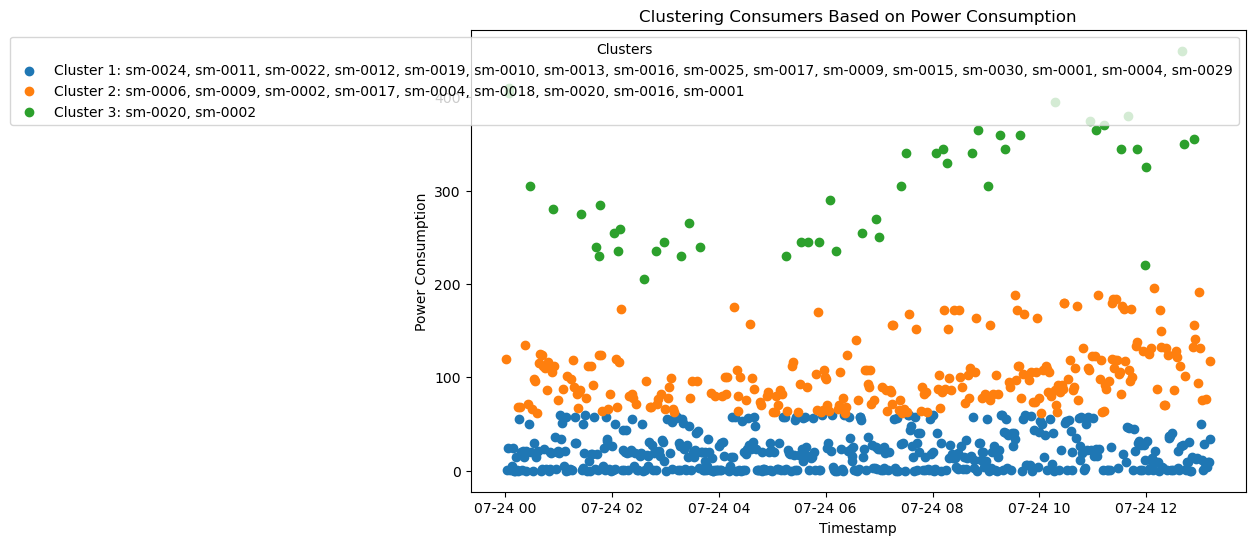

In [22]:
url = 'http://209.38.208.230:8000/api/posts/?date_range=today'
response=requests.get(url).json()
df1=pd.DataFrame(response)
series = df1[['created_date', 'value','devId']]

series.drop_duplicates(subset='created_date', inplace=True)
series['created_date'] = pd.to_datetime(series['created_date'])
series = series[series['created_date'] >= '2023-01-01']
series.set_index('created_date', inplace=True)

num_clusters = 3

# Extract 'value' column as the feature for clustering
X = series['value'].values.reshape(-1, 1)

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add the cluster labels to the DataFrame
series['cluster'] = kmeans.labels_
clusters_with_devId = series[['devId', 'cluster']].copy()

cluster_dict = {}
for cluster_label in range(num_clusters):
    cluster_data = series[series['cluster'] == cluster_label]
    dev_ids = cluster_data['devId'].unique().tolist()
    cluster_dict[f'Cluster {cluster_label + 1}'] = dev_ids

# Optional: Print the clusters with devId
print(cluster_dict)

# Visualize the clusters with devId in the legend
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = series[series['cluster'] == cluster_label]
    plt.scatter(cluster_data.index, cluster_data['value'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('Timestamp')
plt.ylabel('Power Consumption')
plt.title('Clustering Consumers Based on Power Consumption')
plt.legend(title='Clusters', labels=[f"{key}: {', '.join(val)}" for key, val in cluster_dict.items()])
plt.show()
